In [1]:

%pprint
%matplotlib inline

Pretty printing has been turned OFF


In [2]:

import sys, os

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, osp.join(os.pardir, 'py'))

# Get pydub to not give warnings
ffmpeg_path = r'C:\ffmpeg\bin'
paths_list = os.environ['PATH'].split(os.pathsep)
if ffmpeg_path not in paths_list:
    paths_list.append(ffmpeg_path)
    os.environ['PATH'] = os.pathsep.join(paths_list)
    print(os.environ['PATH'])
import inflect

from datetime import date
from matplotlib_inline.backend_inline import set_matplotlib_formats
from scraping_utils import ScrapingUtilities
from spiral_utils import StraussHoweUtilities
from storage import Storage
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

s = Storage()
shu = StraussHoweUtilities(s=s)
su = ScrapingUtilities(s=s)
set_matplotlib_formats('retina')


---

In [4]:

mask_series = (shu.generations_df.index == 'Homeland')
face_slaps_list = ['War on Terror', 'Climate Change', 'Opioid epidemic', 'COVID-19 pandemic', 'Ukraine War']
shu.generations_df.loc[mask_series, 'childhood_turning_description'] = ', '.join(face_slaps_list)
s.store_objects(generations_df=shu.generations_df)
shu = StraussHoweUtilities(s=s)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\generations_df.pkl


In [4]:

generation_names_list = ['Lost', 'G.I.', 'Silent', 'Baby Boom', '13th', 'Millennial', 'Homeland']
mask_series = shu.generations_df.index.isin(generation_names_list)
shu.generations_df[mask_series].sort_values('birth_year_begin').tail(5).T

generation_name,Silent,Baby Boom,13th,Millennial,Homeland
childhood_turning_entered,4,1,2,3,4
saeculum_name,Great Power,Millennial,Millennial,Millennial,Millennial
turnings_archetype,Artist,Prophet,Nomad,Hero,Artist
generations_archetype,Adaptive,Idealist,Reactive,Civic,Adaptive
birth_year_begin,1925,1943,1961,1982,2005
birth_year_end,1942.0,1960.0,1981.0,2004.0,NaN
childhood_turning_description,"Great Depression, World War II, Dust Bowl","Superpower America, Golden Age of Capitalism","Consciousness Revolution, Fourth Great Awakening","Culture Wars, Postmodernism, Neoliberalism, Gr...","Great Recession, War on Terror, Climate Change..."
turning_year_begin,1929,1946,1963,1984,2008
turning_year_end,1946.0,1963.0,1983.0,2008.0,NaN


fit: end_year = 0.9852826348787512 * begin_year + 48.14689737272639
The Homeland Generation: 2008-2026.
The Alpha Generation: 2027-2045.


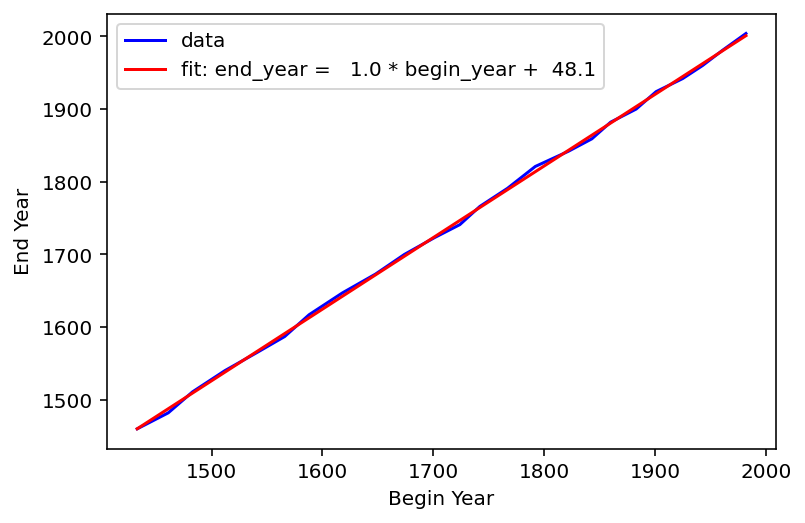

In [7]:

popt, get_end_year_turning = shu.fit_year_curve()
mask_series = shu.generations_df.turning_year_end.isnull()
begin_year_turning = shu.generations_df[mask_series]['turning_year_begin'].tolist()[0]
print('fit: end_year = {} * begin_year + {}'.format(*popt))
end_year_turning = int(get_end_year_turning(begin_year_turning))
print('The Homeland Generation: {}-{}.'.format(begin_year_turning, end_year_turning))
begin_year_turning = end_year_turning + 1
end_year_turning = int(get_end_year_turning(begin_year_turning))
print('The Alpha Generation: {}-{}.'.format(begin_year_turning, end_year_turning))

fit: end_year = 0.9852826348787512 * begin_year + 48.14689737272639
The Homeland Generation: 2005-2023.
The Alpha Generation: 2024-2042.


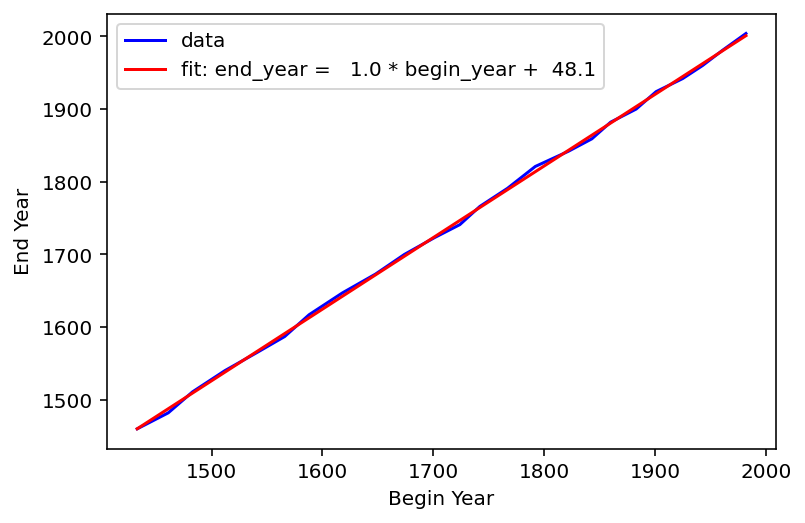

In [6]:

popt, get_end_year_birth = shu.fit_year_curve()
mask_series = shu.generations_df.birth_year_end.isnull()
begin_year_birth = shu.generations_df[mask_series]['birth_year_begin'].tolist()[0]
print('fit: end_year = {} * begin_year + {}'.format(*popt))
end_year_birth = int(get_end_year_birth(begin_year_birth))
print('The Homeland Generation: {}-{}.'.format(begin_year_birth, end_year_birth))
begin_year_birth = end_year_birth + 1
end_year_birth = int(get_end_year_birth(begin_year_birth))
print('The Alpha Generation: {}-{}.'.format(begin_year_birth, end_year_birth))

In [30]:

if 'wikipedia_url' not in shu.generations_df.columns:
    shu.generations_df['wikipedia_url'] = np.nan
    mask_series = (shu.generations_df.index == 'Lost')
    shu.generations_df.loc[mask_series, 'wikipedia_url'] = 'https://en.wikipedia.org/wiki/Lost_Generation'
    mask_series = (shu.generations_df.index == 'G.I.')
    shu.generations_df.loc[mask_series, 'wikipedia_url'] = 'https://en.wikipedia.org/wiki/Greatest_Generation'
    mask_series = (shu.generations_df.index == 'Silent')
    shu.generations_df.loc[mask_series, 'wikipedia_url'] = 'https://en.wikipedia.org/wiki/Silent_Generation'
    mask_series = (shu.generations_df.index == 'Baby Boom')
    shu.generations_df.loc[mask_series, 'wikipedia_url'] = 'https://en.wikipedia.org/wiki/Baby_boomers'
    mask_series = (shu.generations_df.index == '13th')
    shu.generations_df.loc[mask_series, 'wikipedia_url'] = 'https://en.wikipedia.org/wiki/Generation_X'
    mask_series = (shu.generations_df.index == 'Millennial')
    shu.generations_df.loc[mask_series, 'wikipedia_url'] = 'https://en.wikipedia.org/wiki/Millennials'
    mask_series = (shu.generations_df.index == 'Homeland')
    shu.generations_df.loc[mask_series, 'wikipedia_url'] = 'https://en.wikipedia.org/wiki/Generation_Z'
    shu.generations_df.loc[mask_series, 'birth_year_end'] = 2023
    shu.generations_df.loc[mask_series, 'turning_year_end'] = 2026
    s.store_objects(generations_df=shu.generations_df)
mask_series = (shu.generations_df.index == 'Alpha')
if not mask_series.any():
    df = shu.generations_df.sort_values('birth_year_begin').reset_index(drop=False)
    row_dict = {
        'generation_name': 'Alpha',
        'childhood_turning_entered': 1,
        'saeculum_name': 'Meta Modern',
        'turnings_archetype': 'Prophet',
        'generations_archetype': 'Idealist',
        'birth_year_begin': 2024,
        'birth_year_end': 2042,
        'childhood_turning_description': np.nan,
        'turning_year_begin': 2027,
        'turning_year_end': 2045,
        'wikipedia_url': 'https://en.wikipedia.org/wiki/Generation_Alpha'
    }
    df = df.append(row_dict, ignore_index=True)
    s.store_objects(generations_df=df.set_index('generation_name', drop=True))
    shu = StraussHoweUtilities(s=s)

In [29]:

shu.generations_df.childhood_turning_description.to_dict()

{'Arthurian': 'Retreat from France', 'Humanist': 'War of the Roses', 'Reformation': 'Tudor Renaissance', 'Reprisal': 'Protestant Reformation', 'Elizabethan': 'Marian Restoration, Counter-Reformation', 'Parliamentary': 'Armada Crisis', 'Puritan': 'Merrie England', 'Cavalier': 'Puritan Awakening,Antinomian Controversy', 'Glorious': 'English Civil War, Republic, Restoration', 'Enlightenment': "Salem Witch Trials, King Philip's War, Glorious Revolution, War of the Spanish Succession", 'Awakening': 'Augustan Age of Empire', 'Liberty': 'Great Awakening, Age of Enlightenment', 'Republican': 'French and Indian War, British Imperialism', 'Compromise': 'American Revolution, Age of Revolution', 'Transcendental': 'Era of Good Feelings', 'Gilded': 'Transcendental Awakening, Romanticism, Abolitionism', 'Civil War': 'Mexican War and Sectionalism, Gold Rush, Wild West', 'Progressive': 'American Civil War', 'Missionary': 'Reconstruction, Gilded Age', 'Lost': 'Missionary Awakening, Progressive era', 'G.


# Generations

In [26]:

shu.generations_df.sample(5).T

generation_name,Baby Boom,Compromise,Alpha,Lost,Republican
childhood_turning_entered,1,4,1,2,3
saeculum_name,Millennial,Revolutionary,Meta Modern,Great Power,Revolutionary
turnings_archetype,Prophet,Artist,Prophet,Nomad,Hero
generations_archetype,Idealist,Adaptive,Idealist,Reactive,Civic
birth_year_begin,1943,1767,2024,1883,1742
birth_year_end,1960.0,1791.0,2042.0,1900.0,1766.0
childhood_turning_description,"Superpower America, Golden Age of Capitalism","American Revolution, Age of Revolution","COVID-19 pandemic, Ukraine War, social network...","Missionary Awakening, Progressive era","French and Indian War, British Imperialism"
turning_year_begin,1946,1773,2027,1886,1746
turning_year_end,1963.0,1794.0,2045.0,1908.0,1773.0
wikipedia_url,https://en.wikipedia.org/wiki/Baby_boomers,NaN,https://en.wikipedia.org/wiki/Generation_Alpha,https://en.wikipedia.org/wiki/Lost_Generation,NaN


In [17]:

columns_list = ['saeculum_name', 'turnings_archetype']
for generation_name, row_series in shu.generations_df.sort_values('turning_year_begin')[columns_list].iterrows():
    saeculum_name = row_series.saeculum_name
    turnings_archetype = row_series.turnings_archetype
    if turnings_archetype == 'Hero':
        print(f'The {generation_name} generation institutionalized the values of the {saeculum_name} saeculum.')

The Arthurian generation institutionalized the values of the Late Medieval saeculum.
The Elizabethan generation institutionalized the values of the Reformation saeculum.
The Glorious generation institutionalized the values of the New World saeculum.
The Republican generation institutionalized the values of the Revolutionary saeculum.
The Civil War generation institutionalized the values of the Civil War saeculum.
The G.I. generation institutionalized the values of the Great Power saeculum.
The Millennial generation institutionalized the values of the Millennial saeculum.


In [21]:

print(shu.generations_df.turnings_archetype.to_dict())

{'Arthurian': 'Hero', 'Humanist': 'Artist', 'Reformation': 'Prophet', 'Reprisal': 'Nomad', 'Elizabethan': 'Hero', 'Parliamentary': 'Artist', 'Puritan': 'Prophet', 'Cavalier': 'Nomad', 'Glorious': 'Hero', 'Enlightenment': 'Artist', 'Awakening': 'Prophet', 'Liberty': 'Nomad', 'Republican': 'Hero', 'Compromise': 'Artist', 'Transcendental': 'Prophet', 'Gilded': 'Nomad', 'Civil War': 'Hero', 'Progressive': 'Artist', 'Missionary': 'Prophet', 'Lost': 'Nomad', 'G.I.': 'Hero', 'Silent': 'Artist', 'Baby Boom': 'Prophet', '13th': 'Nomad', 'Millennial': 'Hero', 'Homeland': 'Artist', 'Alpha': 'Prophet'}


In [14]:

shu.generations_df.columns.tolist()

['childhood_turning_entered', 'saeculum_name', 'turnings_archetype', 'generations_archetype', 'birth_year_begin', 'birth_year_end', 'childhood_turning_description', 'turning_year_begin', 'turning_year_end', 'wikipedia_url']